In [1]:
## Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Define the directory containing the dataset
data_directory = r"C:\Users\anzda\OneDrive\Desktop\Freelance Work\weatherdata_for_students"

In [7]:
# Identify and collect filenames starting with "colchester"
file_paths = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory) if filename.startswith("colchester")]

In [9]:
## Counting the number of files opened/used
num_files_used = len(file_paths)

In [10]:
# Load data from all files into a single DataFrame
dfs = [pd.read_csv(file_path) for file_path in file_paths]
full_df = pd.concat(dfs)

In [11]:
# Remove columns with numerical names
full_df.drop(full_df.filter(regex='^\d+$').columns, axis=1, inplace=True)

In [12]:
# Display basic information about the dataset
print("Number of files utilized:", num_files_used)
print("\nDataset Information:")
print(full_df.info())

Number of files utilized: 196

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 188135 entries, 0 to 777
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          81468 non-null  object 
 1   temp              81271 non-null  float64
 2   dew               81299 non-null  float64
 3   humidity          81300 non-null  float64
 4   precip            81221 non-null  float64
 5   precipprob        81282 non-null  float64
 6   preciptype        8649 non-null   object 
 7   snow              80177 non-null  float64
 8   snowdepth         80168 non-null  float64
 9   windspeed         81307 non-null  float64
 10  winddir           81278 non-null  float64
 11  sealevelpressure  78154 non-null  float64
 12  cloudcover        79190 non-null  float64
 13  solarradiation    39196 non-null  float64
 14  uvindex           39175 non-null  float64
 15  solarenergy       39192 non-null  float64

In [13]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(full_df.head())


First few rows of the dataset:
              datetime  temp  dew  humidity  precip  precipprob preciptype  \
0  2000-01-01T00:00:00   5.9  5.7     98.63     0.0         0.0        NaN   
1  2000-01-01T01:00:00   6.4  5.8     96.12     0.0         0.0        NaN   
2  2000-01-01T02:00:00   6.6  6.4     98.31     0.0         0.0        NaN   
3  2000-01-01T03:00:00   7.2  6.5     95.92     0.0         0.0        NaN   
4  2000-01-01T04:00:00   7.2  6.6     96.38     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   NaN        NaN        9.4    210.0            1020.6         NaN   
1   NaN        NaN       15.1    233.0            1020.4       100.0   
2   NaN        NaN       13.9    238.0            1020.5       100.0   
3   NaN        NaN       14.1    232.0            1020.5       100.0   
4   NaN        NaN       14.3    242.0            1020.4       100.0   

   solarradiation  uvindex  solarenergy  
0             NaN      N

In [14]:
# Check for missing values
print("\nMissing Values:")
print(full_df.isnull().sum())


Missing Values:
datetime            106667
temp                106864
dew                 106836
humidity            106835
precip              106914
precipprob          106853
preciptype          179486
snow                107958
snowdepth           107967
windspeed           106828
winddir             106857
sealevelpressure    109981
cloudcover          108945
solarradiation      148939
uvindex             148960
solarenergy         148943
dtype: int64


In [15]:
# Generate summary statistics
summary_stats = full_df.describe()

In [16]:
# Clean and preprocess the dataset

# Handle missing values for numerical columns by filling with the median
numerical_cols = full_df.select_dtypes(include=['float64']).columns
full_df[numerical_cols] = full_df[numerical_cols].fillna(full_df[numerical_cols].median())

# Handle missing values for categorical columns by filling with the mode
categorical_cols = full_df.select_dtypes(include=['object']).columns
full_df[categorical_cols] = full_df[categorical_cols].fillna(full_df[categorical_cols].mode().iloc[0])


In [17]:
## Check for missing values after handling
print("\nMissing values after handling:")
print(full_df.isnull().sum())


Missing values after handling:
datetime            0
temp                0
dew                 0
humidity            0
precip              0
precipprob          0
preciptype          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
uvindex             0
solarenergy         0
dtype: int64


In [18]:
## Save the cleaned dataset
full_df.to_csv('cleaned_data.csv', index=False)

In [19]:
# Display updated summary statistics after cleaning
print("\nUpdated Summary Statistics:")
print(full_df.describe())


Updated Summary Statistics:
                temp            dew       humidity         precip  \
count  188135.000000  188135.000000  188135.000000  188135.000000   
mean       10.397958       7.415398      84.176058       0.029846   
std         3.752742       3.137915       9.303149       0.347958   
min        -6.300000      -7.600000      25.730000       0.000000   
25%        10.300000       7.500000      85.830000       0.000000   
50%        10.300000       7.500000      85.830000       0.000000   
75%        10.300000       7.500000      85.830000       0.000000   
max        34.400000      20.600000     100.000000      21.604000   

          precipprob           snow      snowdepth      windspeed  \
count  188135.000000  188135.000000  188135.000000  188135.000000   
mean        4.529460       0.000279       0.015073      15.364456   
std        20.789973       0.021624       0.268348       5.376605   
min         0.000000       0.000000       0.000000       0.000000   
25% 

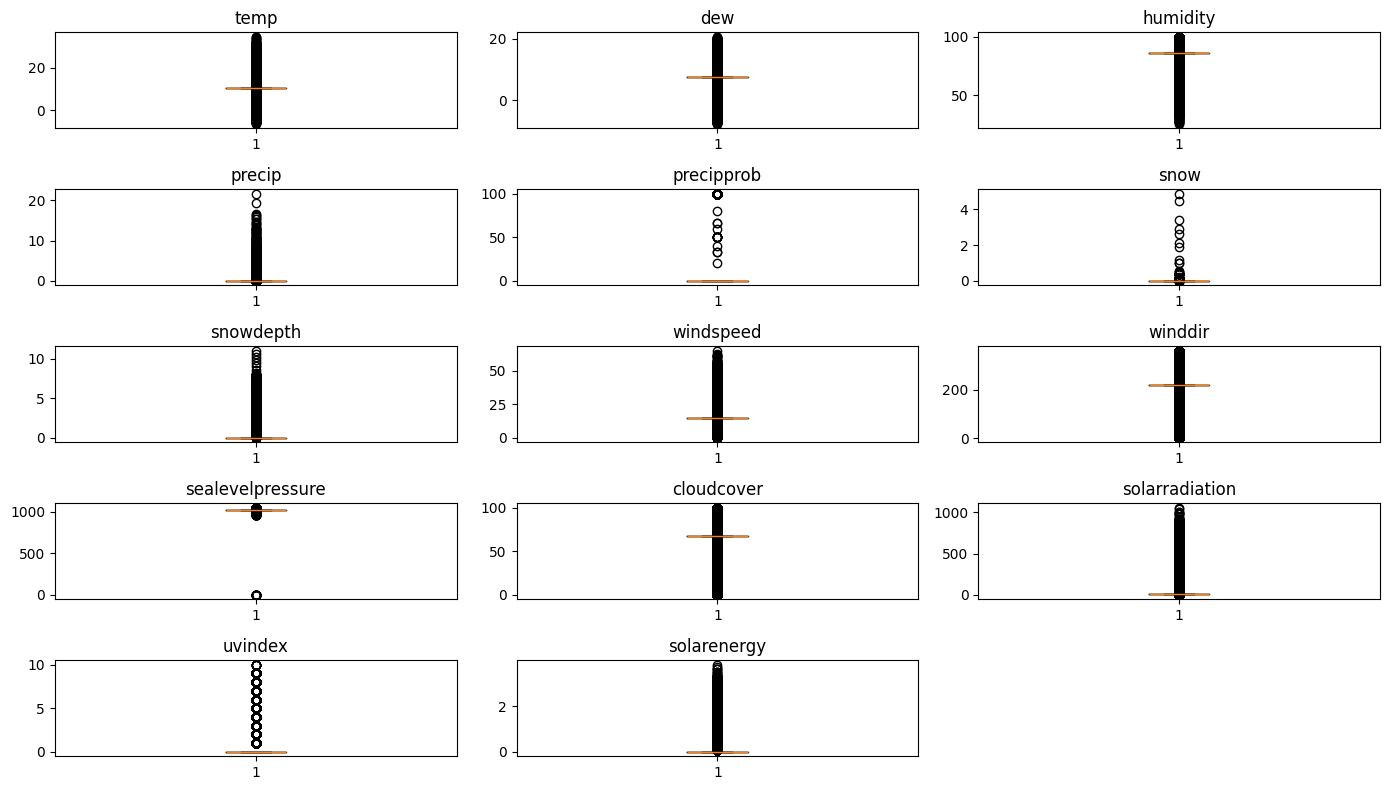

In [20]:
# Generate boxplots for each numerical column
plt.figure(figsize=(14, 8))

num_numerical_cols = len(numerical_cols)
num_rows = (num_numerical_cols // 3) + (1 if num_numerical_cols % 3 != 0 else 0)
for i, col in enumerate(numerical_cols, start=1):
	plt.subplot(num_rows, 3, i)
	plt.boxplot(full_df[col].dropna())
	plt.title(col)

plt.tight_layout()
plt.show()